In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../DATA/mushrooms.csv")

In [5]:
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


<Axes: xlabel='class', ylabel='count'>

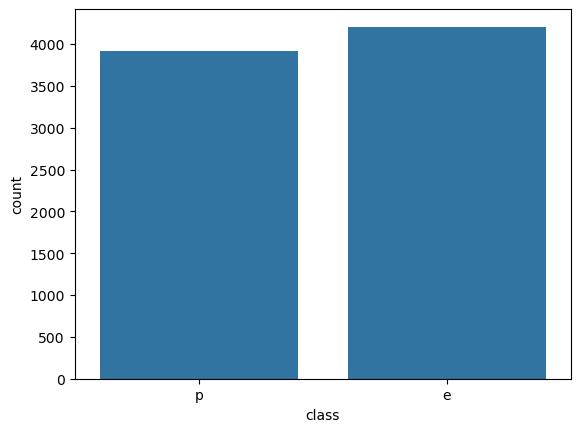

In [7]:
sns.countplot(data=df, x="class")

In [9]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


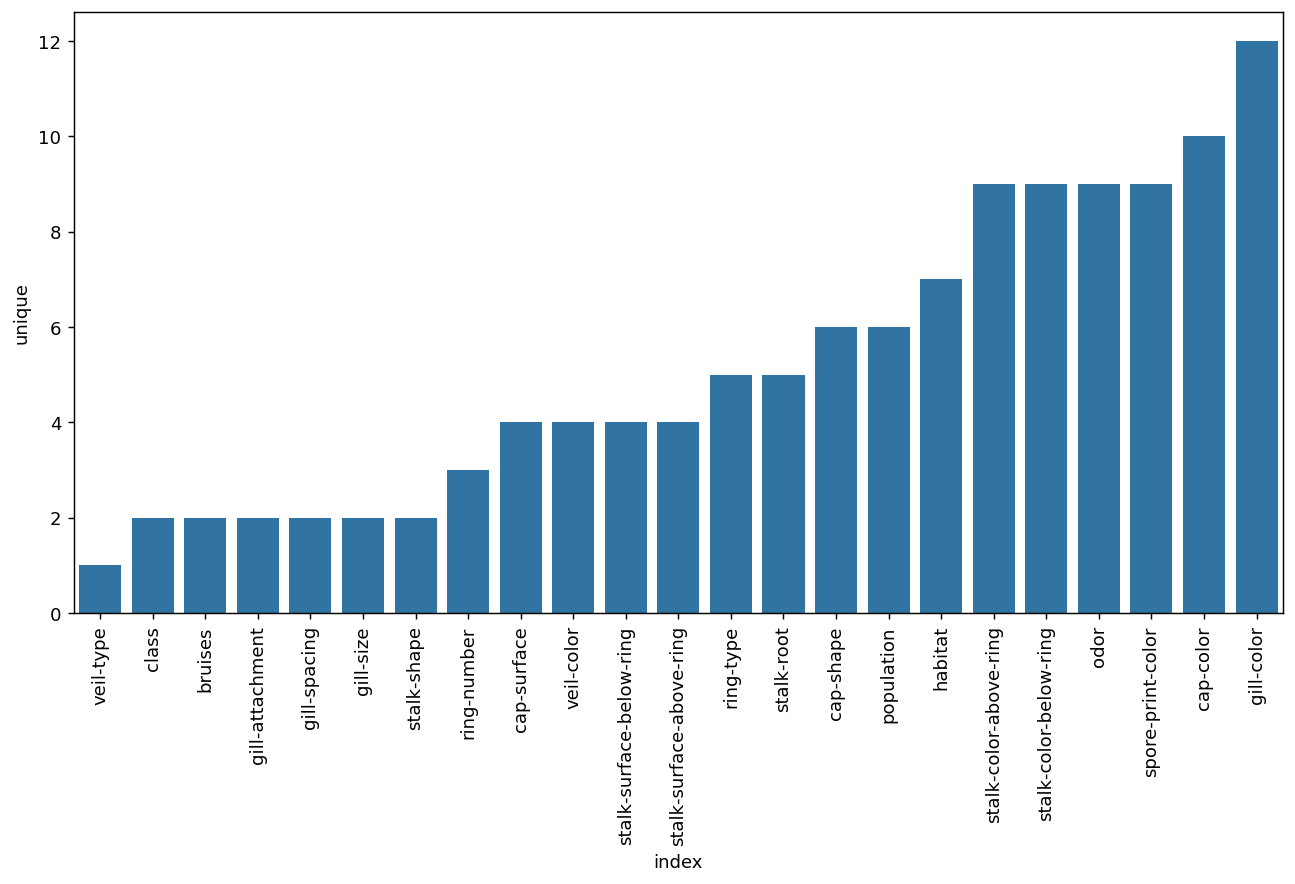

In [23]:
feat_uniq = df.describe().transpose().reset_index().sort_values("unique")
plt.figure(figsize=(12, 6), dpi=130)
sns.barplot(data=feat_uniq, x="index", y="unique")
plt.xticks(rotation=90);

In [25]:
X = df.drop("class", axis=1)

In [27]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [29]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [35]:
X = pd.get_dummies(X, drop_first=True).astype(int)

In [37]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [39]:
y = df["class"]

In [41]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [47]:
from sklearn.ensemble import AdaBoostClassifier

In [49]:
model = AdaBoostClassifier(n_estimators=1)

In [51]:
model.fit(X_train, y_train)

C:\Users\honer\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=1)

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [55]:
preds = model.predict(X_test)

In [57]:
preds

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [59]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [61]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [63]:
model.feature_importances_.argmax()

22

In [65]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

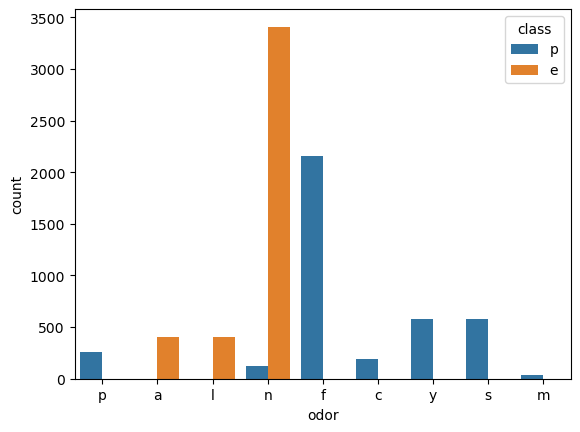

In [79]:
sns.countplot(data=df, x="odor", hue="class")

In [83]:
error_rates = []
for n in range(1, 96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test, preds)
    error_rates.append(err)

C:\Users\honer\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\honer\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\honer\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\honer\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\hon

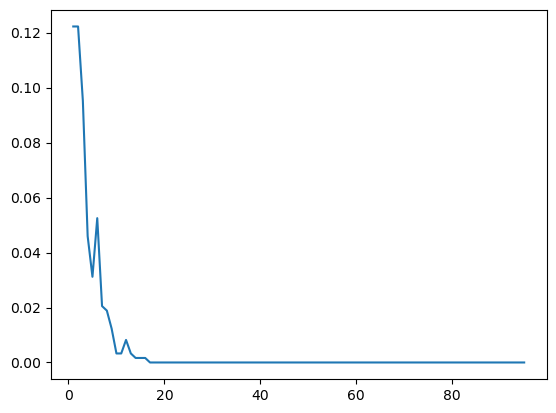

In [85]:
plt.plot(range(1, 96), error_rates)

In [89]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01052632, 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.05263158, 0.03157895, 0.03157895,
       0.        , 0.        , 0.06315789, 0.02105263, 0.        ,
       0.        , 0.        , 0.09473684, 0.09473684, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01052632, 0.01052632, 0.        , 0.        , 0.        ,
       0.06315789, 0.        , 0.        , 0.        , 0.        ,
       0.03157895, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06315789, 0.        , 0.        ,
       0.01052632, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.     

In [91]:
model.feature_importances_.argmax()

82

In [93]:
X.columns[82]

'spore-print-color_w'

In [95]:
model.feature_importances_[82]

0.16842105263157894

In [99]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=["Importance"])

In [101]:
feats

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [103]:
imp_feats  = feats[feats["Importance"] > 0]

In [105]:
imp_feats

,Importance
cap-color_c,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
bruises_t,0.052632
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.094737


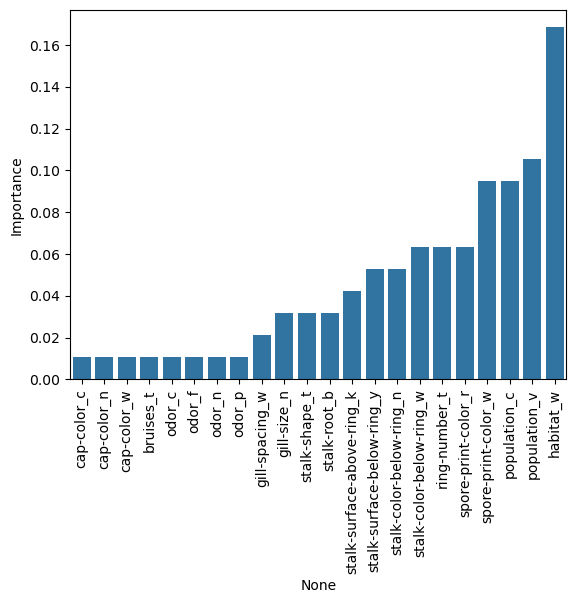

In [111]:
sns.barplot(data=imp_feats.sort_values("Importance"), x=imp_feats.index, y="Importance")
plt.xticks(rotation=90);

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [115]:
from sklearn.ensemble import GradientBoostingClassifier

In [117]:
from sklearn.model_selection import GridSearchCV

In [119]:
param_grid = {"n_estimators": [50, 100], "learning_rate": [0.1, 0.05, 0.2], "max_depth": [3, 4, 5]}

In [121]:
gb_model = GradientBoostingClassifier()
grid = GridSearchCV(gb_model, param_grid)

In [123]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [129]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [131]:
predictions = grid.predict(X_test)

In [133]:
predictions

array(['e', 'p', 'p', ..., 'e', 'e', 'e'], dtype=object)

In [135]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

In [137]:
grid.best_estimator_

GradientBoostingClassifier(max_depth=4)

In [141]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       637
           p       1.00      1.00      1.00       582

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [143]:
grid.best_estimator_.feature_importances_

array([6.10204427e-04, 0.00000000e+00, 1.16135666e-17, 0.00000000e+00,
       0.00000000e+00, 1.58774994e-03, 4.80342733e-16, 2.37359620e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.78114567e-16, 0.00000000e+00, 0.00000000e+00, 1.94358592e-06,
       0.00000000e+00, 6.84720312e-02, 0.00000000e+00, 1.38554169e-02,
       6.36152485e-03, 3.31796558e-03, 6.19584610e-01, 1.27246277e-02,
       0.00000000e+00, 0.00000000e+00, 1.25359437e-07, 3.17964920e-03,
       2.60270790e-03, 0.00000000e+00, 8.04246989e-19, 0.00000000e+00,
       0.00000000e+00, 5.70985353e-16, 0.00000000e+00, 7.71919455e-16,
       2.01109762e-16, 0.00000000e+00, 1.35900486e-17, 0.00000000e+00,
       0.00000000e+00, 1.95034960e-05, 1.14178220e-01, 2.41052793e-02,
       2.60783931e-02, 1.77604622e-03, 0.00000000e+00, 2.04525035e-09,
       0.00000000e+00, 1.48455592e-17, 4.22115594e-02, 5.04462337e-09,
       0.00000000e+00, 0.00000000e+00, 9.02115994e-04, 0.00000000e+00,
      

In [145]:
feat_import = grid.best_estimator_.feature_importances_

In [149]:
imp_feat = pd.DataFrame(index=X.columns, data=feat_import, columns = ["Importance"])

In [151]:
imp_feat

,Importance
cap-shape_c,6.102044e-04
cap-shape_f,0.000000e+00
cap-shape_k,1.161357e-17
cap-shape_s,0.000000e+00
cap-shape_x,0.000000e+00
...,...
habitat_l,7.069595e-06
habitat_m,1.219762e-16
habitat_p,0.000000e+00
habitat_u,3.731533e-17


In [153]:
imp_feat = imp_feat[imp_feat["Importance"]>0.0005]

In [155]:
imp_feat

,Importance
cap-shape_c,0.000610
cap-surface_g,0.001588
bruises_t,0.068472
odor_f,0.013855
odor_l,0.006362
odor_m,0.003318
odor_n,0.619585
odor_p,0.012725
gill-spacing_w,0.003180
gill-size_n,0.002603


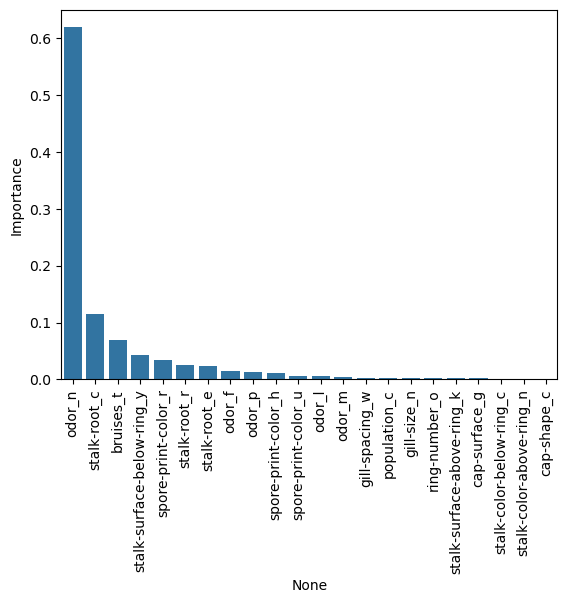

In [163]:
imp_feat = imp_feat.sort_values("Importance", ascending=False)
sns.barplot(data=imp_feat, x=imp_feat.index, y="Importance")
plt.xticks(rotation=90);